# Introducción

**Nombre: Christian Camilo Urcuqui López**

En el presente notebook se desarrolla el reto propuesto por LATAM Airlines, el recurso se componente de las siguientes unidades:

+ [Descripcion del reto y datos](#Descripcion-del-reto-y-datos)
+ [Exploracion](#Exploracion)
    - Respuesta a preguntas
        - [Pregunta 1 y análisis](#Pregunta-1)
        - [Respuesta 1](#Respuesta-1)
        - [Respuesta 2](#Pregunta-2)
        - [Respuesta 3 y análisis](#Pregunta-3)
+ [Preprocesamiento](#Preprocesamiento)
+ [Modelamiento y respuesta 4](#Modelamiento)
+ [Resultados y respuesta 5](#Resultados)


# Descripcion del reto y datos

El problema consiste en predecir la probabilidad de **atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL)**. Para eso les entregamos un dataset usando datos públicos y reales donde **cada fila corresponde a un vuelo que aterrizó o despegó de SCL**. Para cada vuelo se cuenta con la siguiente información:

1. Fecha-I : Fecha y hora programada del vuelo.
2. Vlo-I : Número de vuelo programado.
3. Ori-I : Código de ciudad de origen programado.
4. Des-I : Código de ciudad de destino programado.
5. Emp-I : Código aerolínea de vuelo programado.
6. Fecha-O : Fecha y hora de operación del vuelo.
7. Vlo-O : Número de vuelo de operación del vuelo.
8. Ori-O : Código de ciudad de origen de operación
9. Des-O : Código de ciudad de destino de operación.
10. Emp-O : Código aerolínea de vuelo operado.
11. DIA : Día del mes de operación del vuelo.
12. MES : Número de mes de operación del vuelo.
13. AÑO : Año de operación del vuelo.
14. DIANOM : Día de la semana de operación del vuelo.
15. TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
16. OPERA : Nombre de aerolínea que opera.
17. SIGLAORI : Nombre ciudad origen.
18. SIGLADES : Nombre ciudad destino.

***
**Notas**

El diccionario presenta una cantidad de 18 variables, el cual no explica en detalle rangos, formato, tipos y definición de valores que puedan servir para encontrar errores para corrección.

# Análisis exploratorio

## librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Carga de información

In [2]:
df = pd.read_csv("datasets/dataset_SCL.csv", low_memory=False)

## Exploracion

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


En principio cargado dice que no presenta NaN, sin embargo sería bueno luego indagar ya que hay datos cargados como tipo object

In [6]:
df.head(3)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami


Contamos con una cantidad de 68206 registros por 18 variables (mencionadas en el diccionario de variables)

### transformación

1. Se procederá a cambiar las variables a su debido tipo, por ejemplo la de fecha a datetime en pandas

In [3]:
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])

2. Voy a cambiar el nombre de las columnas para mayor comodidad durante el desarrollo del trabajo

In [4]:
df.columns = df.columns.str.replace("-","_")

In [46]:
df.Vlo_I.unique()

array(['226', '912', '940', '92', '93', '401', '11', '1011', '1281',
       '1283', '1285', '1287', '1289', '1291', '2291', '98', '116', '176',
       '240', '295', '689', '250', '112', '118', '174', '249', '276',
       '495', '4495', '146', '7661', '7663', '9245', '9268', '9362',
       '6830', '702', '624', '28', '846', '709', '741', '8021', '8023',
       '8027', '8029', '8069', '8073', '8075', '8099', '8125', '8137',
       '8160', '8161', '9601', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '1', '3', '7', '9', '13', '15', '17', '21', '23',
       '25', '41', '43', '51', '53', '55', '61', '71', '73', '75', '81',
       '83', '102', '104', '106', '108', '110', '120', '122', '128',
       '130', '132', '134', '140', '142', '150', '156', '160', '162',
       '164', '166', '170', '172', '180', '182', '184', '186', '188',
       '190', '192', '194', '196', '501', '503', '507', '521', '531',
       '551', '800', '802', '804', '1083', '14', '31', '35', '37', '57',
     

La variable de número de vuelo ha sido cargado como object y debería ser númerico, revisando el archivo no parece presentar problemas en los datos, sin embargo, al momento del cargue se presentan algunos valores con ''. 

In [49]:
pd.to_numeric(df.Vlo_I)

ValueError: Unable to parse string "989P" at position 22232

In [52]:
pd.to_numeric(df.Vlo_I.str.replace("P",""))

ValueError: Unable to parse string "846A" at position 39266

El anterior error nos permite determinar que si hay problemas de digitación en la variable

In [70]:
df[df.Vlo_I.isin(["989P","846A", "940P", "591P", "1104A"])]

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
22232,2017-05-13 21:50:00,989P,SCEL,SUMU,AAL,2017-05-13 21:52:00,989,SCEL,SUMU,AAL,13,5,2017,Sabado,I,American Airlines,Santiago,Montevideo
27464,2017-06-16 20:30:00,940P,SCEL,KDFW,AAL,2017-06-16 20:50:00,940,SCEL,KDFW,AAL,16,6,2017,Viernes,I,American Airlines,Santiago,Dallas
39225,2017-08-07 19:00:00,591P,SCEL,LFPG,PUE,2017-08-07 20:35:00,591P,SCEL,LFPG,PUE,7,8,2017,Lunes,I,Plus Ultra Lineas Aereas,Santiago,Paris
39266,2017-08-24 23:00:00,846A,SCEL,KIAH,UAL,2017-08-24 23:00:00,2804,SCEL,KIAH,UAL,24,8,2017,Jueves,I,United Airlines,Santiago,Houston
58126,2017-11-05 17:00:00,1104A,SCEL,SCSE,SKU,2017-11-05 17:42:00,1104,SCEL,SCSE,SKU,5,11,2017,Domingo,N,Sky Airline,Santiago,La Serena


Hay 5 registros con errores de digitación 

## Conclusiones 

+ EL dataset cuenta errores de digitación en `Vlo-I` 

## Respuesta a preguntas 

### Pregunta 1

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [17]:
print("fecha minima {} y fecha maxima {}".format(df["Fecha_I"].min(),df["Fecha_I"].max()))

fecha minima 2017-01-01 00:15:00 y fecha maxima 2017-12-31 23:55:00


In [16]:
print("fecha minima {} y fecha maxima {}".format(df["Fecha_O"].min(),df["Fecha_O"].max()))

fecha minima 2017-01-01 00:04:00 y fecha maxima 2018-01-01 00:12:00


Hubieron vuelos programados durante 2017 y la última operación se realizo el primero de enero de 2018.

In [18]:
df.Ori_I.value_counts()

SCEL    68206
Name: Ori_I, dtype: int64

In [21]:
len(df.Des_I.unique())

64

<AxesSubplot:xlabel='Des_I', ylabel='count'>

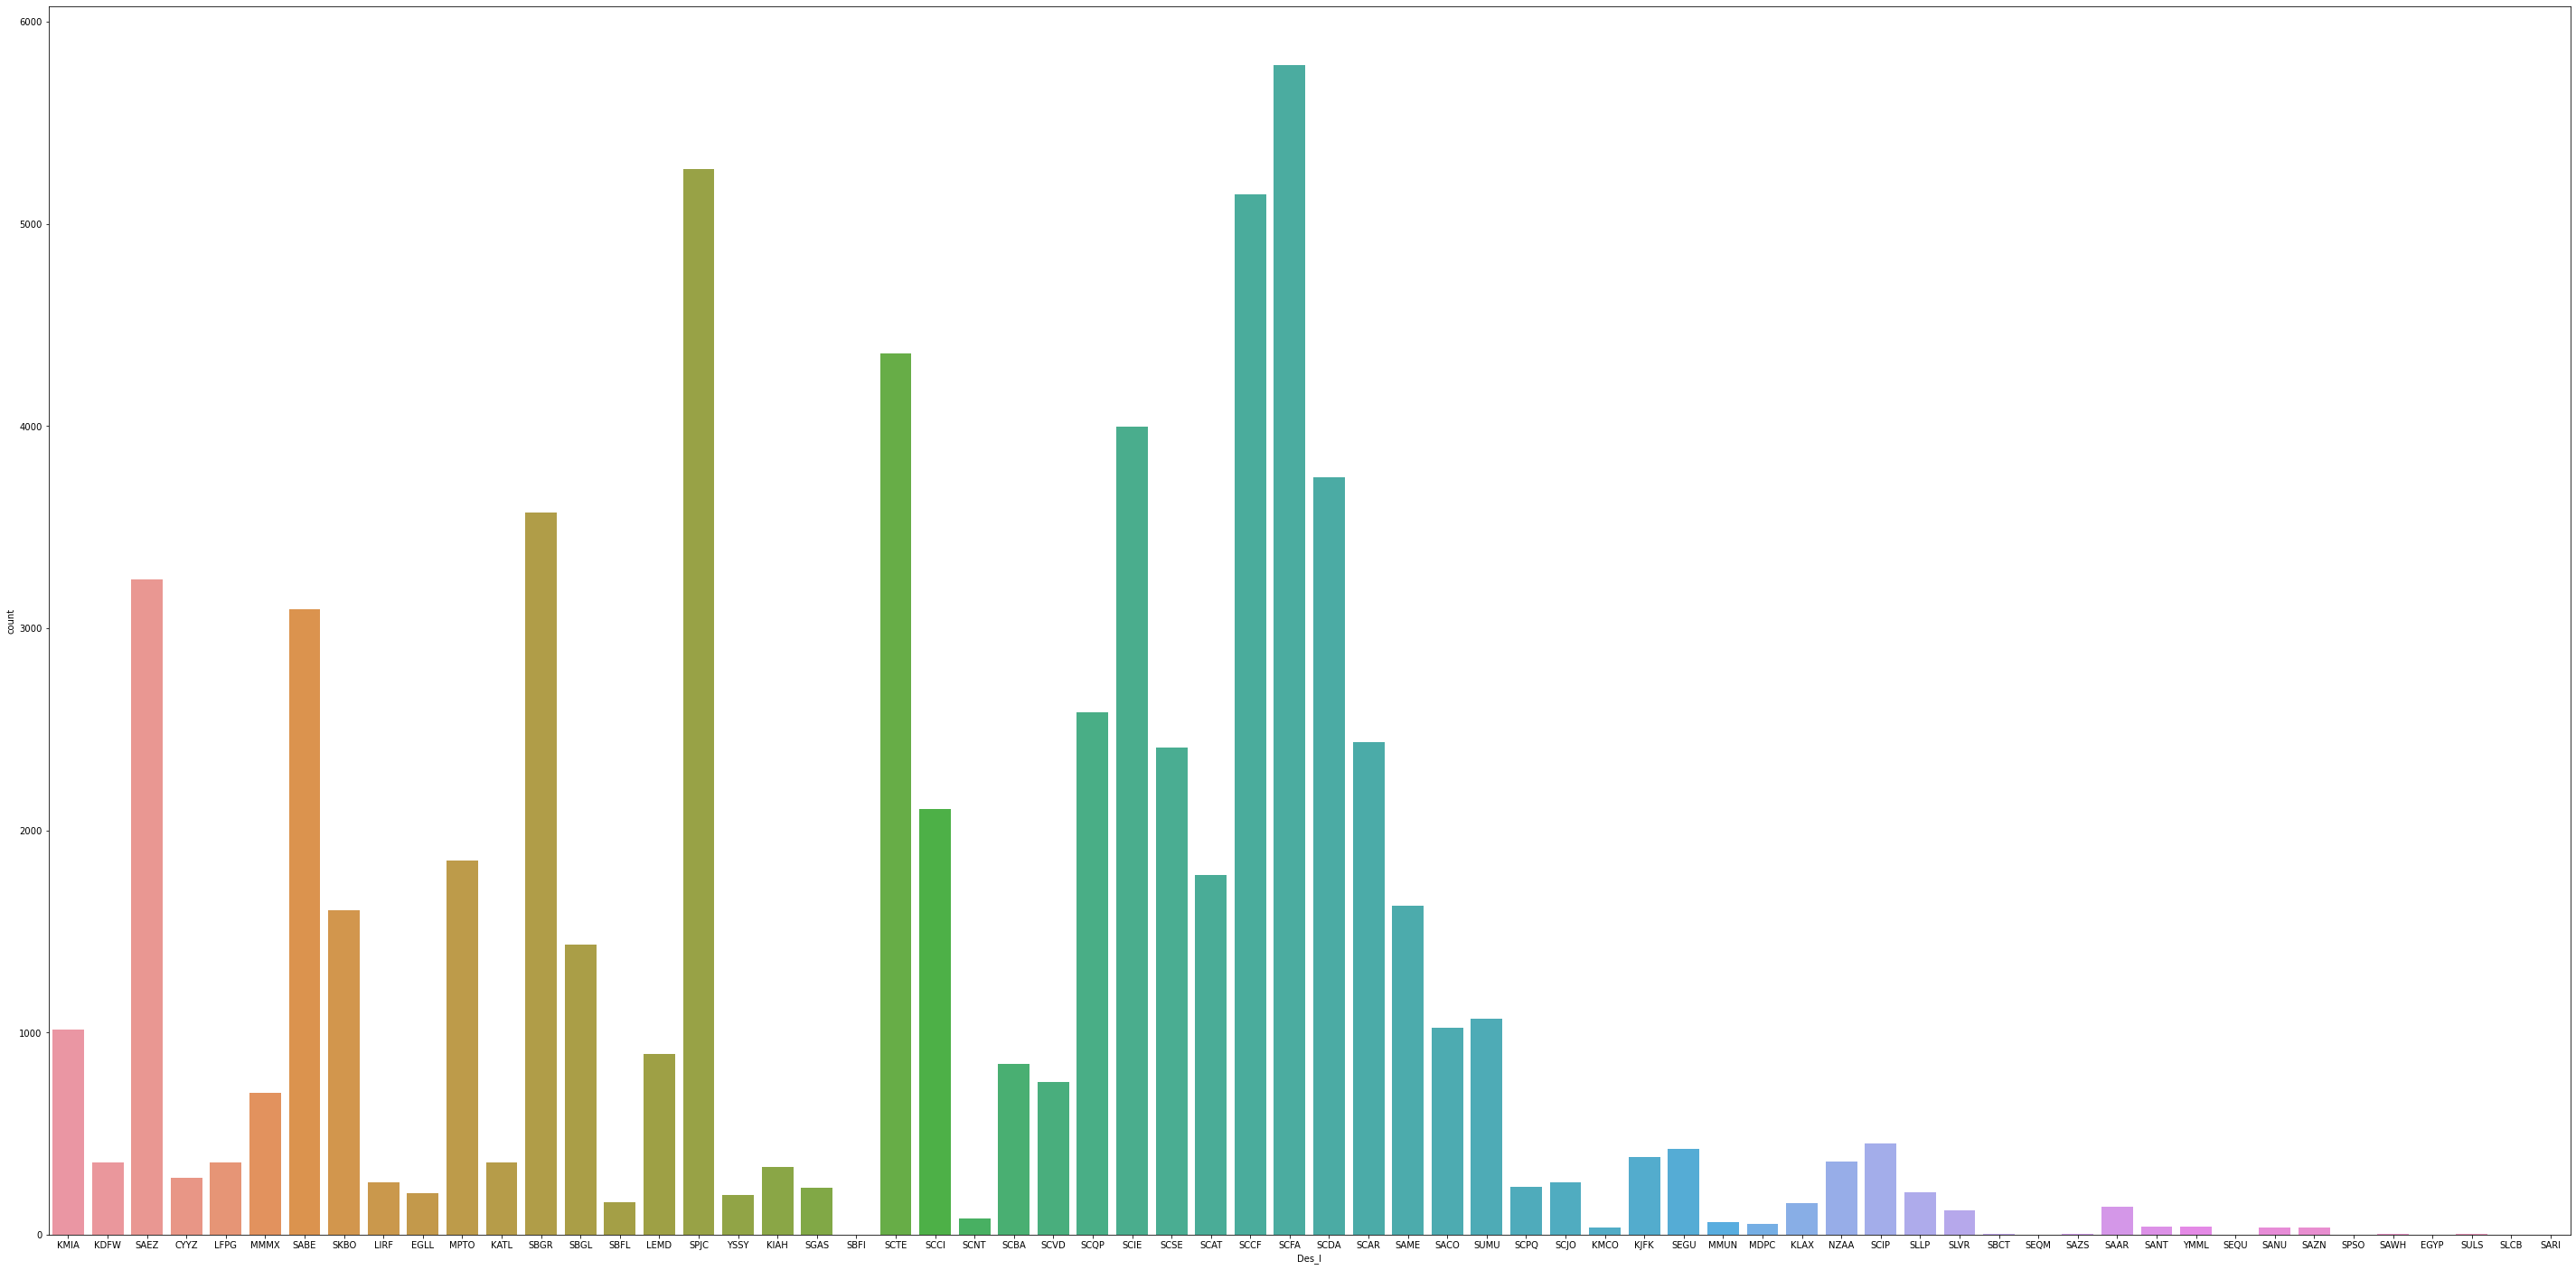

In [31]:
plt.figure(figsize=(50,25))
sns.countplot(x=df.Des_I)

Solo hubo un origen programado de ciudad, de acuerdo con Internet el código SCEL pertenece al aeropuerto [Arturo Merino Benítez International Airport](https://airportcodes.aero/scel). En total hubieron 64 ciudad destino programadas, algunos con bastantes registros y otros no tanto. 

Entre los más visitados se encuentran los siguientes destinos nacionales y uno internacional:
+ SCFA: Cerro Moreno International Airport (Chile)
+ SPJC: Jorge Chávez International Airport (Perú)
+ SCCF: El Loa Airport (Chile)
+ SCTE: El Tepual Airport (Chile)



In [35]:
df.Des_I.value_counts()[:30]

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
SCDA    3747
SBGR    3570
SAEZ    3240
SABE    3094
SCQP    2583
SCAR    2436
SCSE    2410
SCCI    2105
MPTO    1850
SCAT    1780
SAME    1625
SKBO    1604
SBGL    1434
SUMU    1066
SACO    1023
KMIA    1015
LEMD     894
SCBA     843
SCVD     753
MMMX     700
SCIP     452
SEGU     423
KJFK     383
NZAA     361
LFPG     359
Name: Des_I, dtype: int64

In [37]:
df.Des_I.value_counts()[-30:]

LIRF    259
SCJO    259
SCPQ    235
SGAS    232
SLLP    209
EGLL    205
YSSY    195
SBFL    162
KLAX    155
SAAR    136
SLVR    120
SCNT     79
MMUN     63
MDPC     54
YMML     38
SANT     38
SAZN     37
SANU     35
KMCO     34
SULS      6
SAWH      6
SBCT      3
SAZS      2
SLCB      1
SPSO      1
SEQM      1
EGYP      1
SBFI      1
SARI      1
SEQU      1
Name: Des_I, dtype: int64

In [39]:
df.Emp_I.value_counts()[:]

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp_I, dtype: int64

In [40]:
df.Emp_I.value_counts(normalize=True)

LAN    0.551432
SKU    0.209630
TAM    0.044703
ARG    0.028575
CMP    0.027124
LAW    0.023077
AVA    0.016890
JAT    0.016054
GLO    0.011817
AAL    0.011099
ACA    0.008284
IBE    0.005307
AFR    0.005249
DAL    0.005249
AMX    0.005146
UAL    0.004912
ONE    0.004091
AZA    0.003797
KLM    0.003680
LAP    0.003167
BAW    0.003006
QFU    0.002859
JMR    0.001466
LRC    0.001349
AUT    0.001085
PUE    0.000718
LXP    0.000132
LPE    0.000059
DSM    0.000029
LNE    0.000015
Name: Emp_I, dtype: float64

La aerolineas que más presentan vuelos son LAN (55%) y SKU (22%).

In [80]:
df[df.Vlo_I.isin(["989P","846A", "940P", "591P", "1104A"])==False].Vlo_I.astype(int).value_counts()

174     686
11      645
116     608
150     557
704     556
       ... 
1334      1
1142      1
1502      1
1301      1
9851      1
Name: Vlo_I, Length: 579, dtype: int64

Respecto a los números de los vuelos programados hay algunos con varias repeticiones y otros con pocas.

In [81]:
df.Ori_O.value_counts()

SCEL    68206
Name: Ori_O, dtype: int64

In [83]:
len(df.Des_O.unique())

63

Hay una ciudad de destino operación que no aparece en el conjunto de códigos destinos programados

Respuesta: KIAD

In [84]:
set(df.Des_O.unique()) - set(df.Des_I.unique()) 

{'KIAD'}

In [85]:
set(df.Des_I.unique()) -set(df.Des_O.unique())

{'SARI', 'SEQU'}

Hay códigos de ciudad destino programados que no aparecen en los códigos de ciudad destino de operación.


Respuesta: SARI, SEQU

In [86]:
df.Des_O.value_counts()

SCFA    5786
SPJC    5270
SCCF    5146
SCTE    4357
SCIE    3993
        ... 
SEQM       2
KIAD       1
EGYP       1
SPSO       1
SLCB       1
Name: Des_O, Length: 63, dtype: int64

Entre los más visitados a nivel de operación se encuentran los siguientes destinos nacionales y uno internacional:

+ SCFA: Cerro Moreno International Airport (Chile)
+ SPJC: Jorge Chávez International Airport (Perú)
+ SCCF: El Loa Airport (Chile)
+ SCTE: El Tepual Airport (Chile)

In [87]:
df.Emp_O.value_counts(normalize=True)

LAN    0.307715
LXP    0.213442
SKU    0.209630
TAM    0.044659
ARG    0.028531
CMP    0.027124
JMR    0.024147
LPE    0.017799
JAT    0.016054
AVA    0.012975
GLO    0.011817
AAL    0.011099
ACA    0.008284
DSM    0.007228
LNE    0.005483
IBE    0.005307
AFR    0.005249
DAL    0.005249
LRC    0.005234
AMX    0.005146
UAL    0.004912
ONE    0.004091
AZA    0.003797
KLM    0.003680
LAP    0.003211
BAW    0.003006
QFA    0.002859
AUT    0.001129
PUE    0.000718
56R    0.000249
48O    0.000147
TPU    0.000029
Name: Emp_O, dtype: float64

La aerolineas que más presentan vuelos a nivel de operación son LAN (30%) y LXP (21%), lo anterior contrarresta contra los valores a nivel de programación.

In [14]:
df.DIA.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [16]:
df.MES.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [15]:
df.AÑO.sort_values().unique()

array([2017, 2018], dtype=int64)

In [18]:
df.DIANOM.unique()

array(['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Sabado',
       'Viernes'], dtype=object)

In [20]:
df.DIANOM.value_counts(normalize=True)

Viernes      0.150896
Jueves       0.150295
Lunes        0.148535
Domingo      0.143624
Miercoles    0.142539
Martes       0.141659
Sabado       0.122453
Name: DIANOM, dtype: float64

Revisando las variables relacionadas a fecha de operación (día, mes y año) no presentan algún error.

In [21]:
df.DIANOM.value_counts()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

La variable día de la semana de operación de vuelo muestra que los jueves y viernes son los días de más vuelos (más no es muy significativo contra los otros días) y el día de menos registros es el sábado. 

In [23]:
df.TIPOVUELO.value_counts(normalize=True)

N    0.541976
I    0.458024
Name: TIPOVUELO, dtype: float64

Los vuelos más recurrentes son los nacionales con un 54% de la información frente a los internacionales.

In [24]:
df.OPERA.value_counts(normalize=True)

Grupo LATAM                 0.599537
Sky Airline                 0.209630
Aerolineas Argentinas       0.028575
Copa Air                    0.027124
Latin American Wings        0.024543
Avianca                     0.016890
JetSmart SPA                0.016054
Gol Trans                   0.011817
American Airlines           0.011099
Air Canada                  0.008284
Iberia                      0.005307
Delta Air                   0.005249
Air France                  0.005249
Aeromexico                  0.005146
United Airlines             0.004912
Oceanair Linhas Aereas      0.004091
Alitalia                    0.003797
K.L.M.                      0.003680
British Airways             0.003006
Qantas Airways              0.002859
Lacsa                       0.001349
Austral                     0.001085
Plus Ultra Lineas Aereas    0.000718
Name: OPERA, dtype: float64

El Grupo LATAM (60%) y Sky Airline (21%) son las aerolineas con mayor cantidad de vuelos registrados.

In [26]:
df.SIGLAORI.value_counts()

Santiago    68206
Name: SIGLAORI, dtype: int64

In [29]:
df.SIGLADES.value_counts(normalize=True)[:30]

Buenos Aires        0.092880
Antofagasta         0.084831
Lima                0.077266
Calama              0.075448
Puerto Montt        0.063880
Concepcion          0.058543
Iquique             0.054937
Sao Paulo           0.052327
Temuco              0.037959
Arica               0.035715
La Serena           0.035334
Punta Arenas        0.030862
Ciudad de Panama    0.027124
Copiapo             0.026097
Mendoza             0.023825
Bogota              0.023517
Rio de Janeiro      0.021039
Montevideo          0.015629
Cordoba             0.014999
Miami               0.014896
Madrid              0.013107
Balmaceda           0.012301
Valdivia            0.011040
Ciudad de Mexico    0.010263
Isla de Pascua      0.006627
Guayaquil           0.006187
Nueva York          0.005601
Auckland N.Z.       0.005293
Paris               0.005263
Atlanta             0.005249
Name: SIGLADES, dtype: float64

In [31]:
df.Ori_I

0        SCEL
1        SCEL
2        SCEL
3        SCEL
4        SCEL
         ... 
68201    SCEL
68202    SCEL
68203    SCEL
68204    SCEL
68205    SCEL
Name: Ori_I, Length: 68206, dtype: object

### Respuesta 1

Recapitulando el análisis realizado y con el contexto recolectado del desafio podemos tener las siguientes conclusiones:

- Hay 5 registros con errores de digitación para los números de vuelos programados - `Vlo-I`, se encuentran encontrarón los siguientes valores "989P","846A", "940P", "591P", "1104A".
- Hubieron vuelos programados durante 2017 y la última operación se realizo el primero de enero de 2018.
- Solo hubo un origen programado de ciudad, de acuerdo con Internet el código `SCEL` pertenece al aeropuerto [Arturo Merino Benítez International Airport](https://airportcodes.aero/scel). En total hubieron 64 ciudad destino programadas, algunos con bastantes registros y otros no tanto.
- La aerolineas que más presentan vuelos son LATAM (55%) y Sky Airline (22%).
- Hay una ciudad de destino en operaciones que no aparece en el conjunto de códigos destinos programados Respuesta: KIAD
- Hay códigos de ciudad destino programados que no aparecen en los códigos de ciudad destino de operación. Respuesta: SARI, SEQU
- La variable día de la semana de operación de vuelo muestra que los jueves y viernes son los días de más vuelos (más no es muy significativo contra los otros días) y el día de menos registros es el sábado.
- Los vuelos más recurrentes son los nacionales con un 54% de la información frente a los internacionales.
- Entre los más visitados se encuentran los siguientes destinos nacionales y uno internacional:
    - SCFA: Cerro Moreno International Airport (Chile)
    - SPJC: Jorge Chávez International Airport (Perú)
    - SCCF: El Loa Airport (Chile)
    - SCTE: El Tepual Airport (Chile)


**Preguntas por realizar a negocio**

- ¿Es normal que aparezcan códigos de operación que no sean incluidos en los vuelos programados? ¿de manera contrataría también?
- ¿El código de ciudad corresponde al código de identificación de los aeropuertos?
- ¿Cúal sería la manera de corregir el problema de digitación detectado en `Vlo-I`?



***

### Pregunta 2

Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
+ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
+ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
+ atraso_15 : 1 si dif_min > 15, 0 si no.
+ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

In [5]:
df["temporada_alta"] = np.where((df.Fecha_I >= "2017-12-15") | (df.Fecha_I <= "2017-03-03"), 1, 0)

In [6]:
df["dif_min"]  = (df.Fecha_O - df.Fecha_I).dt.components.minutes

In [7]:
df["atraso_15"] = np.where(df.dif_min > 15, 1, 0)

In [10]:
df["periodo_dia"] = np.where((df.Fecha_I.dt.hour >= 5) & (df.Fecha_I.dt.hour < 12),"mañana","")
df["periodo_dia"] = np.where((df.Fecha_I.dt.hour >= 12) & (df.Fecha_I.dt.hour < 19),"tarde", df.periodo_dia)
df.loc[df.periodo_dia == "", "periodo_dia"] = "noche"

***

### Pregunta 3

¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

In [15]:
pd.crosstab(df.atraso_15, df.temporada_alta, normalize=True)

temporada_alta,0,1
atraso_15,,
0,0.435504,0.130208
1,0.336877,0.097411


El atraso de los vuelos no se ven impactados en temporadas altas

In [16]:
pd.crosstab(df.atraso_15, df.TIPOVUELO, normalize=True)

TIPOVUELO,I,N
atraso_15,,
0,0.240785,0.324927
1,0.217239,0.217048


El atraso de los vuelos no se ven impactados por el tipo de vuelo

In [17]:
pd.crosstab(df.atraso_15, df.DIANOM, normalize=True)

DIANOM,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes
atraso_15,,,,,,,
0,0.080931,0.084919,0.083028,0.079714,0.081855,0.068689,0.086576
1,0.062692,0.065375,0.065507,0.061945,0.060684,0.053764,0.064320


Voy a explorar una aproximación revisando el mutual information score 

In [27]:
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

features = ["Des_O", "Emp_O", "MES", "DIA", "temporada_alta", "TIPOVUELO"]
discrete_features = [True, True, True, True, True, True]

df_2 = df.copy()
categ=["Des_O", "Emp_O", "DIA", "TIPOVUELO"]
le = preprocessing.LabelEncoder()
df_2[categ] = df_2[categ].apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(df_2[features], df_2.atraso_15, test_size=0.33, random_state=42)

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features= discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train, discrete_features)


In [28]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

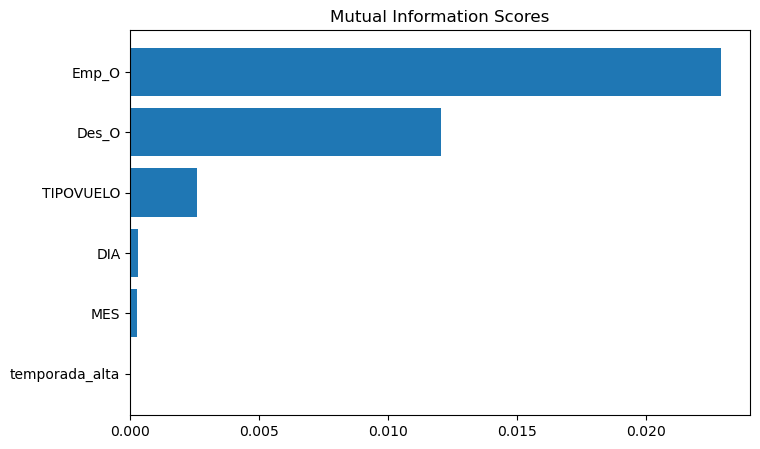

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

En principio esperaría que los atrasos fueran influidos por el día, mes, temporada alta y el tipo de vuelo; sin embargo, utilizando el anterior análisis entre las variables podriamos decir que la aerolinea y el destino incluyen los valores que más afectan a los atrasos de los vuelos.

El trabajo a futuro sería indagar un poco más en el resultado para encontrar aquellos valores de mayor y menor impacto en los atrasos de los vuelos en compañia del negocio.

## Preprocesamiento

En la presente unidad se automatiza el proceso de carga y transformación 

In [1]:
# librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

random_state = 5
np.random.seed(random_state)

# datos
df = pd.read_csv("datasets/dataset_SCL.csv", low_memory=False)

# transformaciones
df = pd.read_csv("datasets/dataset_SCL.csv", low_memory=False)
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])
df.columns = df.columns.str.replace("-","_")

# ingenieria de variables
df["temporada_alta"] = np.where((df.Fecha_I >= "2017-12-15") | (df.Fecha_I <= "2017-03-03"), 1, 0)
df["dif_min"]  = (df.Fecha_O - df.Fecha_I).dt.components.minutes
df["atraso_15"] = np.where(df.dif_min > 15, 1, 0)
df["periodo_dia"] = np.where((df.Fecha_I.dt.hour >= 5) & (df.Fecha_I.dt.hour < 12),"mañana","")
df["periodo_dia"] = np.where((df.Fecha_I.dt.hour >= 12) & (df.Fecha_I.dt.hour < 19),"tarde", df.periodo_dia)
df.loc[df.periodo_dia == "", "periodo_dia"] = "noche"

## Modelamiento

Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.

**Backward selection**

Para el modelamiento partire desde una aproximación con la mayor cantidad de variables (sin incluir las variables temporales de fecha) y luego ir reduciendo la complejidad.

Hay que tener presente que existe un desbalance a nivel de los valores de la variable objetivo.

In [17]:
df.atraso_15.value_counts(normalize=True)

0    0.565713
1    0.434287
Name: atraso_15, dtype: float64

### Experimento 1

+ El experimento 1 tendrá como proposito entrenar un conjunto de  algoritmos clasificatorios (RandomForest, Naive Bayes y SVM) a partir de una aproxmación de holdout.

In [2]:
features = list(set(df.columns) - set(["Vlo_I",  "Fecha_I", "Fecha_O",  "Vlo_O", "AÑO"]))

In [3]:
df_2 = df[features].copy()
categ = list(set(df_2.select_dtypes("object").columns.values) - set(["atraso_15"]))
le = preprocessing.LabelEncoder()
df_2[categ] = df_2[categ].apply(le.fit_transform)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features = list(set(features) - set(["atraso_15"]))

X_train, X_test, y_train, y_test = train_test_split(df_2[features], df_2.atraso_15, test_size=0.20, random_state=random_state)

In [131]:
"""
El siguiente código crea un transformer por cada columna object para el training, lo cual deberá aplicarse para el testing.
Lo evaluare si el tiempo lo permite 
"""
# el siguiente codigo lo pondre a revisión
# categ = X_train.select_dtypes("object").columns.values
# label_trans = []
# for i in categ:    
#     le = preprocessing.LabelEncoder()
#     le.fit(X_train[i])
#     X_train[i] = le.transform(X_train[i])
#     label_trans.append(le)

# for e, i in enumerate(categ):        
#     print(e, i)
#     X_test[i] = label_trans[e].transform(X_test[i])    

In [30]:
clf = RandomForestClassifier(max_depth=2,  random_state=random_state)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [31]:
y_pred = clf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
    
print(classification_report(y_test, y_pred))
print(metrics.cohen_kappa_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7670
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     13642
   macro avg       1.00      1.00      1.00     13642
weighted avg       1.00      1.00      1.00     13642

1.0


El anterior resultado nos permite concluir que holdout no fue una buena aproximación teniendo presente que la variable objetivo cuenta con un desbalance en sus valores.

In [33]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(metrics.cohen_kappa_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7670
           1       0.97      0.96      0.96      5972

    accuracy                           0.97     13642
   macro avg       0.97      0.97      0.97     13642
weighted avg       0.97      0.97      0.97     13642

0.933658665441433


+ Al parecer el primer modelo presenta un sobreajuste a diferencia del segundo, por lo anterior voy a revisar reduciendo la complejidad.

### Experimento 2

Con base al anterior resultado voy a disminuir la cantidad de variables y ver el impacto de aquellas que mejor score se obtuvieron durante el análisis de la [pregunta 3](#Pregunta-3)

In [28]:
clf = RandomForestClassifier(max_depth=2,  random_state=random_state)
clf.fit(X_train[["Emp_O", "Des_O"]], y_train)

y_pred = clf.predict(X_test[["Emp_O", "Des_O"]])
print(classification_report(y_test, y_pred))
print(metrics.cohen_kappa_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.60      0.87      0.71      7670
           1       0.60      0.26      0.36      5972

    accuracy                           0.60     13642
   macro avg       0.60      0.56      0.54     13642
weighted avg       0.60      0.60      0.56     13642

0.13449411906470232


In [29]:
clf = GaussianNB()
clf.fit(X_train[["Emp_O", "Des_O"]], y_train)

y_pred = clf.predict(X_test[["Emp_O", "Des_O"]])

print(classification_report(y_test, y_pred))
print(metrics.cohen_kappa_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.88      0.70      7670
           1       0.57      0.20      0.30      5972

    accuracy                           0.58     13642
   macro avg       0.58      0.54      0.50     13642
weighted avg       0.58      0.58      0.53     13642

0.09050578941468557


### Experimento 3

In [13]:
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train, discrete_features)


In [14]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

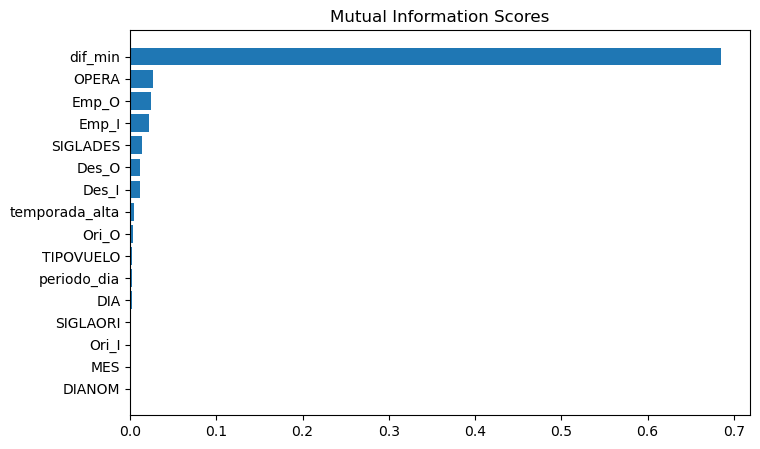

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [27]:
clf = RandomForestClassifier(max_depth=2,  random_state=random_state)
clf.fit(X_train[["dif_min"]], y_train)

y_pred = clf.predict(X_test[["dif_min"]])
print(classification_report(y_test, y_pred))
print(metrics.cohen_kappa_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7670
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     13642
   macro avg       1.00      1.00      1.00     13642
weighted avg       1.00      1.00      1.00     13642

1.0


Es claro que incluir la independeniente que permitio crear la variable dependiente tiene un gran impacto en la predicción, por lo anterior voy a proponer otro experimento sin tener la anterior presente.

### Experimento 4

En el presente experimento se reducen el número de variables aquellas con mejor capacidad de mutual information score.

In [36]:
clf = RandomForestClassifier(max_depth=2,  random_state=random_state)
clf.fit(X_train[["OPERA","Emp_O", "Des_O"]], y_train)

y_pred = clf.predict(X_test[["OPERA","Emp_O", "Des_O"]])
print(classification_report(y_test, y_pred))
print(metrics.cohen_kappa_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.92      0.72      7670
           1       0.64      0.19      0.29      5972

    accuracy                           0.60     13642
   macro avg       0.62      0.55      0.51     13642
weighted avg       0.61      0.60      0.53     13642

0.11642977758406192


In [35]:
clf = RandomForestClassifier(max_depth=2,  random_state=random_state)
clf.fit(X_train[["SIGLADES","Emp_O", "Des_O"]], y_train)

y_pred = clf.predict(X_test[["SIGLADES","Emp_O", "Des_O"]])
print(classification_report(y_test, y_pred))
print(metrics.cohen_kappa_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.89      0.71      7670
           1       0.62      0.22      0.32      5972

    accuracy                           0.60     13642
   macro avg       0.61      0.56      0.52     13642
weighted avg       0.60      0.60      0.54     13642

0.12093052193695175


In [26]:
clf = GaussianNB()
clf.fit(X_train[["OPERA", "Emp_O", "Des_O"]], y_train)

y_pred = clf.predict(X_test[["OPERA", "Emp_O", "Des_O"]])

print(classification_report(y_test, y_pred))
print(metrics.cohen_kappa_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.88      0.71      7670
           1       0.58      0.21      0.31      5972

    accuracy                           0.59     13642
   macro avg       0.59      0.55      0.51     13642
weighted avg       0.59      0.59      0.53     13642

0.09919157002073298


In [37]:
clf = GaussianNB()
clf.fit(X_train[["SIGLADES", "Emp_O", "Des_O"]], y_train)

y_pred = clf.predict(X_test[["SIGLADES", "Emp_O", "Des_O"]])

print(classification_report(y_test, y_pred))
print(metrics.cohen_kappa_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.88      0.70      7670
           1       0.57      0.20      0.30      5972

    accuracy                           0.58     13642
   macro avg       0.58      0.54      0.50     13642
weighted avg       0.58      0.58      0.53     13642

0.09110767206669546


In [38]:
1-0.62

0.38

### Conclusión y trabajo futuro

Con base los experimentos 1-4 se podría decir que el mejor modelo es aquel entrenado con las variables "SIGLADES", "Emp_O", "Des_O" y un algortimo de RandomForest. 

El mejor modelo hasta el momento cuenta con una capacidad contra falsos positivos del 62%, pero con una baja detección de retrasos del 20%. El anterior resultado tocaría revisarlo con negocio para validar si el performance a nivel de detección es adecuado o no. 

Se propone como trabajo futuro explorar la aplicación de ingeniería de variables, ver el comportamiento temporal y estudiar la perspectiva del problema como cuantitativo prediciendo la variable `dif_min`

## Resultados

Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?

A continuación, se realiza el análisis del performance de los modelos entrenados y evaluados en la [anterior unidad](#Modelamiento). Las mátricas utilizadas fueron `precision, recall, f1-score y cohen kappa`, las anteriores nos permitirán evaluar la efectividad del modelo contra errores tipo I y II, adicionalmente con la última métrica se valorará la capacidad de predicción del modelo a pesar de ser entrenado con un desbalance en la variable objetivo.

Para el conjunto se seleccionaron los algoritmos Random Forest y Naive Bayes para el desarrollo de modelos base, los anteriores fueron estudiados debido a que el primero es bastante robusto para un escenario de despliegue en batch de datos y el segundo (Naive Bayes) para requerimientos de despliegue en datos continuos. Es importante mencionar que no se exploraron otros algoritmos que podrían ser incluidos debido a que los datos traen comportamiento temporal, por ejemplo análisis de series de tiempo o la aplicación de redes neuronales profundas con Prophet. 

Por el momento podría decir que las variables que mejoran la predicción son las siguientes:
+ Emp-O : Código aerolínea de vuelo operado.
+ Emp-I : Código aerolínea de vuelo programado.
+ SIGLADES: Nombre ciudad destino.

Además, realizaría un análisis para ver el impacto de las anteriores en la prediccióin con shap values y otra aplicación con análisis exploratorio para dar mayor intepretabilidad al resultado.

El performance lo podría mejorar aplicando ingeniería de variables, explorando otros algoritmos predictivos (por ejemplo, XGBoost, regresión logistica, deep learning, series temporales, etc.), incluendo más información y entendiendo más el contexto del negocio.